In [1]:
## Dev and Test bed for various UI-related utility functions 

In [2]:
import numpy as np
import os

In [29]:
## To be called on the selected path after the selectfile/folder entity

def load_dataset_directory(folder_path):
    try:
        ## Verifying the selected folder structure
        assert os.path.isdir(folder_path), f"The selected {folder_path} is not a directory"
        scans_path = folder_path+"scans/"
        assert os.path.isdir(scans_path), "The selcted directory must contain a 'scans/' folder"
        labels_path = folder_path+"labels/"
        assert os.path.isdir(labels_path), "The selcted directory must contain a 'labels/' folder"

        ## List all the files in common between scans and labels subfolders
        scans = os.listdir(scans_path)
        # scans = [scan.replace(scans_path) for scan in scans]
        scans = ["".join(scan.split(".")[:-1]) for scan in scans]

        txts= os.listdir(labels_path)
        # txts= [txt.replace(labels_path) for txt in txts]
        txts= ["".join(txt.split(".")[:-1]) for txt in txts]

        scans = [scan for scan in scans if scan in txts]
        return len(scans), scans
    
    except AssertionError as e:
        return -1, e
        
    
# print(load_dataset_directory("./data/")[1])

['1', '2', '3']


In [65]:
def parse_label_string(string):
    ''' Expecting a comma separated string of "xloc, yloc, [ or ]"  '''

    contents = [string.strip() for string in string.split(",")]
    assert len(contents) == 3, f"Expected 3 comma-separated items but got {len(contents)} in \"{', '.join(contents)}\""

    [xloc,yloc, cls] = contents
    xloc = float(xloc)
    yloc = float(yloc)
    assert cls in ["[", "]"], f"Expected [ or ] but got '{cls}'"
    cls = 1 if cls=="[" else 2

    return 0, {'xloc': xloc, 'yloc':yloc, 'cls':cls }

def parse_textbox_labels(text):
    ''' Expecting a semicolon separated string of "xloc, yloc, [ or ]" as substrings '''
    
    try:
        substrings = text.split(";")
        substrings = [substring.strip() for substring in text.split(";")]
        labels = [parse_label_string(substring)[1] for substring in substrings]
        return len(labels), labels
    
    except AssertionError as e:
        return -1, e
    
def label_2_string(label):
    string_els = []
    string_els.append(label['xloc'])
    string_els.append(label['yloc'])
    string_els.append("[" if label['cls']==1 else "]")
    string_els = [str(el) for el in string_els]
    string = ", ".join(string_els)
    return string
    
def labels_2_string(labels):
    string = ";\n".join([label_2_string(label) for label in labels])
    return string


# print(parse_label_string("34,65, ]")[1])
# print()
# a_labels = parse_textbox_labels("34,1.2,[; 0,3.1,]")[1]
# print("a_labels")
# print(a_labels)
# print()
# a_string = labels_2_string(a_labels)
# print("a_string")
# print(a_string)

In [75]:
# m = np.random.rand(self.pc.shape[0]) < f  ## [QUESTION: I would instead randomize the indicies, then down sample]
m = np.arange(1000)
np.random.shuffle(m)
m = m[:200]
print(m.shape)
print(m[10000])
print(m[0:10000:10])

(200,)


IndexError: index 10000 is out of bounds for axis 0 with size 200

In [76]:
path = 'C:/Users/KZTYLF/Documents/playground/GNN UIs/GNN InstanceSegmentation/data/labels/53.txt'
os.path.isfile(path)

True

In [78]:
with open('r', "C:/Users/KZTYLF/Documents/playground/GNN UIs/GNN InstanceSegmentation/data/labels/53.txt") as f:
    lines = f.readlines()
    print(lines)
    

ValueError: invalid mode: 'C:/Users/KZTYLF/Documents/playground/GNN UIs/GNN InstanceSegmentation/data/labels/53.txt'

arc1_xy.shape (2, 1)
arc2_xy.shape (2, 1)
R.shape (2, 2)
arc1_xy
[[0.125]
 [0.25 ]]
arc2_xy
[[ 0.125]
 [-0.25 ]]
####
(array([0.25]), array([0.625]))
####
(array([0.75]), array([0.625]))


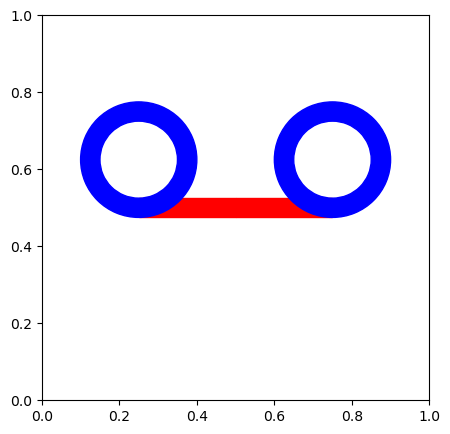

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch

center = (0.5, 0.5)
straight_x_offset = -.10
straight_height = .5
straight_width = 0.05 
arc_radius = 0.125
arc_offset = 0
width = .50
height = 0.8
rotation =90

theta = np.radians(rotation)
c,s = np.cos(theta), np.sin(theta)
R = np.array([[c, -s],[s, c]])


straight_xy = (center[0] - straight_width/2.0, center[1] - straight_height/2.0)
r_ca =  np.array([-straight_width/2.0, -straight_height/2.0]).reshape((2,1))
# straight_xy2 = (center[0] - straight_width/2.0, center[1] - straight_height/2.0)
# center_arr = np.array([center[0], center[1]]).reshape((2,1))
# center_arr = np.array([center[0] - straight_width/2.0, center[1] - straight_height/2.0]).reshape((2,1))
center_arr = np.array([center[0] , center[1]]).reshape((2,1))
arc1_xy = np.array([center[0]+arc_radius, center[1]+straight_height/2.0]).reshape((2,1))
arc2_xy = np.array([center[0]+arc_radius, center[1]-straight_height/2.0]).reshape((2,1))



fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
# ax.add_patch(patch.Annulus((arc1_xy), arc_radius+straight_width/2.0, straight_width, color="green"))
# ax.add_patch(patch.Annulus((arc2_xy), arc_radius+straight_width/2.0, straight_width, color="green"))
# ax.add_patch(patch.Rectangle(straight_xy, straight_width, straight_height, angle=rotation, color="red"))
# # ax.add_patch(patch.Arc((arc1_xy), arc_radius*2.0, arc_radius*2.0, theta1=-90, theta2=180, color="blue"))
# # ax.add_patch(patch.Circle((arc1_xy), arc_radius, color="blue"))

print("arc1_xy.shape", arc1_xy.shape )
print("arc2_xy.shape", arc2_xy.shape )
print("R.shape", R.shape)

arc1_xy -=center_arr
arc2_xy -=center_arr
print("arc1_xy")
print(arc1_xy)
print("arc2_xy")
print(arc2_xy)


r_ca_1 = R@r_ca +center_arr
# ax.add_patch(patch.Rectangle(r_ca_1, straight_width, straight_height, angle=rotation, color="red"))
# arc1_xy_1 = arc1_xy@R
# arc1_xy = arc1_xy_1[0], arc1_xy_1[1]

# arc1_xy_2 = np.linalg.inv(R)@arc1_xy
# arc1_xy_2 = R@arc1_xy

arc1_xy_2 = R@arc1_xy + center_arr 
arc1_xy = arc1_xy_2[0], arc1_xy_2[1]
print("####")
print(arc1_xy)

# arc2_xy_1 = arc2_xy@R
# arc2_xy = arc2_xy_1[0], arc2_xy_1[1]

# arc2_xy_2 = R@arc2_xy 
arc2_xy_2 = R@arc2_xy + center_arr
# arc2_xy_2 = np.linalg.inv(R)@arc2_xy
arc2_xy = arc2_xy_2[0], arc2_xy_2[1]
print("####")
print(arc2_xy)

ax.add_patch(patch.Circle((center[0], center[1]), 0.02, color="black"))
ax.add_patch(patch.Rectangle((center[0], center[1]), straight_width/2.0, straight_height/2.0, angle=rotation, color="red"))
ax.add_patch(patch.Rectangle((center[0], center[1]), -straight_width/2.0, straight_height/2.0, angle=rotation, color="red"))
ax.add_patch(patch.Rectangle((center[0], center[1]), -straight_width/2.0, -straight_height/2.0, angle=rotation, color="red"))
ax.add_patch(patch.Rectangle((center[0], center[1]), straight_width/2.0, -straight_height/2.0, angle=rotation, color="red"))
ax.add_patch(patch.Annulus((arc1_xy), arc_radius+straight_width/2.0, straight_width, color="blue"))
ax.add_patch(patch.Annulus((arc2_xy), arc_radius+straight_width/2.0, straight_width, color="blue"))


plt.show()

In [4]:
staple_params = {
    'lh':0.5,
    'lw':0.05,
    'r':0.125,
    'color':"#000",
    'alpha': 0.1,
    
    
}
def add_staple_patch(ax, center, angle, cls):
    
    theta = np.radians(angle)
    c,s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s],[s, c]])
    
    _center = np.array(center).reshape((2,1))
    
    if cls ==1:
        arc1_xy = np.array([center[0]+staple_params['r'], center[1]+staple_params['lh']/2.0]).reshape((2,1))
        arc2_xy = np.array([center[0]+staple_params['r'], center[1]-staple_params['lh']/2.0]).reshape((2,1))
    elif cls==2:
        arc1_xy = np.array([center[0]-staple_params['r'], center[1]+staple_params['lh']/2.0]).reshape((2,1))
        arc2_xy = np.array([center[0]-staple_params['r'], center[1]-staple_params['lh']/2.0]).reshape((2,1))
    
    arc1_xy -=_center
    arc2_xy -=_center
    
    arc1_xy = R@arc1_xy + _center
    arc2_xy = R@arc2_xy + _center

    a = ax.add_patch(patch.Rectangle((center[0], center[1]), staple_params['lw']/2.0, staple_params['lh']/2.0, angle=angle, color=staple_params['color'], alpha=staple_params['alpha']))
    b = ax.add_patch(patch.Rectangle((center[0], center[1]), -staple_params['lw']/2.0, staple_params['lh']/2.0, angle=angle, color=staple_params['color'], alpha=staple_params['alpha']))
    c = ax.add_patch(patch.Rectangle((center[0], center[1]), -staple_params['lw']/2.0, -staple_params['lh']/2.0, angle=angle, color=staple_params['color'], alpha=staple_params['alpha']))
    d = ax.add_patch(patch.Rectangle((center[0], center[1]), staple_params['lw']/2.0, -staple_params['lh']/2.0, angle=angle, color=staple_params['color'], alpha=staple_params['alpha']))
    e = ax.add_patch(patch.Annulus((arc1_xy), arc_radius+straight_width/2.0, straight_width, color=staple_params['color'], alpha=staple_params['alpha']))
    f = ax.add_patch(patch.Annulus((arc2_xy), arc_radius+straight_width/2.0, straight_width, color=staple_params['color'], alpha=staple_params['alpha']))
    
    patches = [a,b,c,d,e,f]
    print(patches)
    return patches
    
    
    
    

[<matplotlib.patches.Rectangle object at 0x000001F0FD4D8580>, <matplotlib.patches.Rectangle object at 0x000001F0FD4282E0>, <matplotlib.patches.Rectangle object at 0x000001F0FD428D90>, <matplotlib.patches.Rectangle object at 0x000001F0FD428C70>, <matplotlib.patches.Annulus object at 0x000001F0FD428790>, <matplotlib.patches.Annulus object at 0x000001F0FD428700>]
[<matplotlib.patches.Rectangle object at 0x000001F0FD45F010>, <matplotlib.patches.Rectangle object at 0x000001F0FD42AB30>, <matplotlib.patches.Rectangle object at 0x000001F0FD42AE60>, <matplotlib.patches.Rectangle object at 0x000001F0FD42B430>, <matplotlib.patches.Annulus object at 0x000001F0FD42BA60>, <matplotlib.patches.Annulus object at 0x000001F0FD42B250>]


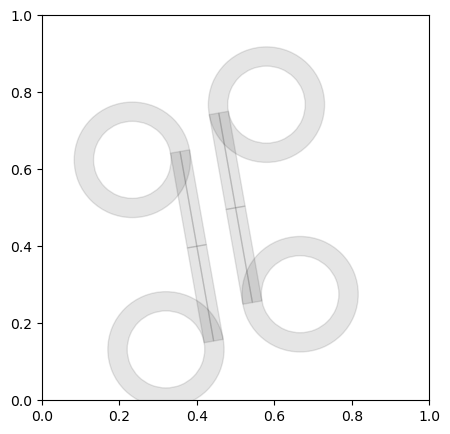

In [8]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
a = add_staple_patch(ax, (0.5,0.5), 10, 1)
b = add_staple_patch(ax, (0.4,0.4), 10, 2)

In [203]:
for b in a:
    b.remove()

In [216]:
for patch in ax.patches:
    patch.remove()

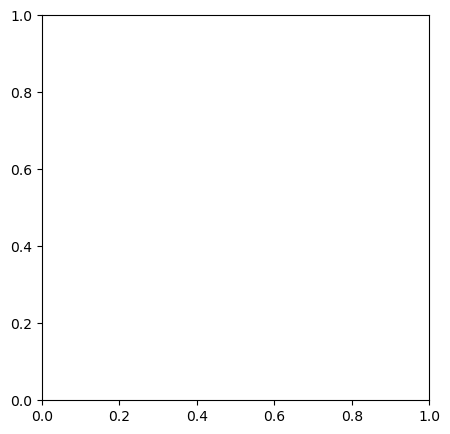

In [217]:
fig

In [222]:
text = "dk; dk;"

In [224]:
substrings = [substring.strip() for substring in text.split(";")]
# substrings = [substring for substring in substrings if substring!=""]
        
# labels = [parse_label_string(substring)[1] for substring in substrings]
#         return len(labels), labels
substrings

['dk', 'dk', '']

In [11]:
";dfaj;ksdh; ".strip(";")

'dfaj;ksdh; '